## import des biblioteque

In [205]:
import pandas as pd
import sqlite3

In [206]:
# connexion a la basse de donnees 
conn = sqlite3.connect('/home/green/Desktop/brife6_s2/etape_1_clean_merge/database.sqlite')
cursor = conn.cursor()

In [207]:
# Charge de les tables

df_country = pd.read_sql_query("SELECT * FROM Country", conn)
df_match = pd.read_sql_query("select * from Match", conn)
df_player_attributtes  = pd.read_sql_query("select * from Player_Attributes",conn)
df_Team_Attributes = pd.read_sql_query("select * from Team_Attributes", conn)
df_League  = pd.read_sql_query("select * from League", conn)
df_Player = pd.read_sql_query("select * from Player", conn)
df_Team = pd.read_sql_query("select * from Team", conn)


## 1. Comprendre et Préparer les Données

##  1-1Country

In [208]:
df_country

,id,name
0,1,Belgium
1,1729,England
2,4769,France
3,7809,Germany
4,10257,Italy
5,13274,Netherlands
6,15722,Poland
7,17642,Portugal
8,19694,Scotland
9,21518,Spain


In [209]:
df_country.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      11 non-null     int64 
 1   name    11 non-null     object
dtypes: int64(1), object(1)
memory usage: 308.0+ bytes


## 1-2-League

In [210]:
df_League

,id,country_id,name
0,1,1,Belgium Jupiler League
1,1729,1729,England Premier League
2,4769,4769,France Ligue 1
3,7809,7809,Germany 1. Bundesliga
4,10257,10257,Italy Serie A
5,13274,13274,Netherlands Eredivisie
6,15722,15722,Poland Ekstraklasa
7,17642,17642,Portugal Liga ZON Sagres
8,19694,19694,Scotland Premier League
9,21518,21518,Spain LIGA BBVA


In [211]:
df_League.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          11 non-null     int64 
 1   country_id  11 non-null     int64 
 2   name        11 non-null     object
dtypes: int64(2), object(1)
memory usage: 396.0+ bytes


## 1-3- Team

In [212]:
df_Team.head()

,id,team_api_id,team_fifa_api_id,team_long_name,team_short_name
0,1,9987,673.0,KRC Genk,GEN
1,2,9993,675.0,Beerschot AC,BAC
2,3,10000,15005.0,SV Zulte-Waregem,ZUL
3,4,9994,2007.0,Sporting Lokeren,LOK
4,5,9984,1750.0,KSV Cercle Brugge,CEB


## clean Team

In [213]:
df_Team_1 = df_Team.drop(columns=['team_fifa_api_id','team_short_name'])
df_Team_1

,id,team_api_id,team_long_name
0,1,9987,KRC Genk
1,2,9993,Beerschot AC
2,3,10000,SV Zulte-Waregem
3,4,9994,Sporting Lokeren
4,5,9984,KSV Cercle Brugge
...,...,...,...
294,49479,10190,FC St. Gallen
295,49837,10191,FC Thun
296,50201,9777,Servette FC
297,50204,7730,FC Lausanne-Sports


In [214]:
df_Team_1.isnull().sum()

id                0
team_api_id       0
team_long_name    0
dtype: int64

## 1-4-Team_attributes

In [215]:
df_Team_Attributes.head()

,id,team_fifa_api_id,team_api_id,date,buildUpPlaySpeed,buildUpPlaySpeedClass,buildUpPlayDribbling,buildUpPlayDribblingClass,buildUpPlayPassing,buildUpPlayPassingClass,...,chanceCreationShooting,chanceCreationShootingClass,chanceCreationPositioningClass,defencePressure,defencePressureClass,defenceAggression,defenceAggressionClass,defenceTeamWidth,defenceTeamWidthClass,defenceDefenderLineClass
0,1,434,9930,2010-02-22 00:00:00,60,Balanced,NaN,Little,50,Mixed,...,55,Normal,Organised,50,Medium,55,Press,45,Normal,Cover
1,2,434,9930,2014-09-19 00:00:00,52,Balanced,48.0,Normal,56,Mixed,...,64,Normal,Organised,47,Medium,44,Press,54,Normal,Cover
2,3,434,9930,2015-09-10 00:00:00,47,Balanced,41.0,Normal,54,Mixed,...,64,Normal,Organised,47,Medium,44,Press,54,Normal,Cover
3,4,77,8485,2010-02-22 00:00:00,70,Fast,NaN,Little,70,Long,...,70,Lots,Organised,60,Medium,70,Double,70,Wide,Cover
4,5,77,8485,2011-02-22 00:00:00,47,Balanced,NaN,Little,52,Mixed,...,52,Normal,Organised,47,Medium,47,Press,52,Normal,Cover


In [216]:
df_Team_Attributes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458 entries, 0 to 1457
Data columns (total 25 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              1458 non-null   int64  
 1   team_fifa_api_id                1458 non-null   int64  
 2   team_api_id                     1458 non-null   int64  
 3   date                            1458 non-null   object 
 4   buildUpPlaySpeed                1458 non-null   int64  
 5   buildUpPlaySpeedClass           1458 non-null   object 
 6   buildUpPlayDribbling            489 non-null    float64
 7   buildUpPlayDribblingClass       1458 non-null   object 
 8   buildUpPlayPassing              1458 non-null   int64  
 9   buildUpPlayPassingClass         1458 non-null   object 
 10  buildUpPlayPositioningClass     1458 non-null   object 
 11  chanceCreationPassing           1458 non-null   int64  
 12  chanceCreationPassingClass      14

In [217]:
df_Team_Attributes.isnull().sum()

id                                  0
team_fifa_api_id                    0
team_api_id                         0
date                                0
buildUpPlaySpeed                    0
buildUpPlaySpeedClass               0
buildUpPlayDribbling              969
buildUpPlayDribblingClass           0
buildUpPlayPassing                  0
buildUpPlayPassingClass             0
buildUpPlayPositioningClass         0
chanceCreationPassing               0
chanceCreationPassingClass          0
chanceCreationCrossing              0
chanceCreationCrossingClass         0
chanceCreationShooting              0
chanceCreationShootingClass         0
chanceCreationPositioningClass      0
defencePressure                     0
defencePressureClass                0
defenceAggression                   0
defenceAggressionClass              0
defenceTeamWidth                    0
defenceTeamWidthClass               0
defenceDefenderLineClass            0
dtype: int64

###      &&&&&& Clean df_Team_Attributes &&&&&&

In [218]:
column_select = [
    'team_api_id', 'date', 
    'buildUpPlaySpeed', 'buildUpPlayPassing',
    'chanceCreationPassing', 'chanceCreationCrossing', 'chanceCreationShooting',
    'defencePressure', 'defenceAggression', 'defenceTeamWidth'
]
df_Team_Attributes_clean = df_Team_Attributes[column_select]
df_Team_Attributes_clean.isnull().sum()


#df_Team_Attributes_clean

team_api_id               0
date                      0
buildUpPlaySpeed          0
buildUpPlayPassing        0
chanceCreationPassing     0
chanceCreationCrossing    0
chanceCreationShooting    0
defencePressure           0
defenceAggression         0
defenceTeamWidth          0
dtype: int64

## ======= merge Team & Team attributes : (df_Team_1  , df_Team_Attributes_clean)

In [219]:
df_merge_team_and_team_attributes = df_Team_1.merge(df_Team_Attributes_clean , on='team_api_id', how='left')

In [220]:
df_merge_team_and_team_attributes

,id,team_api_id,team_long_name,date,buildUpPlaySpeed,buildUpPlayPassing,chanceCreationPassing,chanceCreationCrossing,chanceCreationShooting,defencePressure,defenceAggression,defenceTeamWidth
0,1,9987,KRC Genk,2010-02-22 00:00:00,45.0,45.0,50.0,35.0,60.0,70.0,65.0,70.0
1,1,9987,KRC Genk,2011-02-22 00:00:00,66.0,52.0,65.0,66.0,51.0,48.0,47.0,54.0
2,1,9987,KRC Genk,2012-02-22 00:00:00,53.0,55.0,55.0,48.0,56.0,47.0,45.0,55.0
3,1,9987,KRC Genk,2013-09-20 00:00:00,58.0,38.0,67.0,48.0,56.0,47.0,45.0,55.0
4,1,9987,KRC Genk,2014-09-19 00:00:00,58.0,38.0,67.0,48.0,56.0,47.0,45.0,55.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1464,50204,7730,FC Lausanne-Sports,2010-02-22 00:00:00,30.0,60.0,40.0,60.0,60.0,55.0,60.0,50.0
1465,50204,7730,FC Lausanne-Sports,2012-02-22 00:00:00,37.0,49.0,52.0,60.0,48.0,43.0,43.0,55.0
1466,50204,7730,FC Lausanne-Sports,2013-09-20 00:00:00,51.0,49.0,52.0,60.0,48.0,43.0,43.0,55.0
1467,50204,7730,FC Lausanne-Sports,2014-09-19 00:00:00,37.0,49.0,52.0,60.0,52.0,46.0,44.0,55.0


In [221]:
df_merge_team_and_team_attributes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1469 entries, 0 to 1468
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      1469 non-null   int64  
 1   team_api_id             1469 non-null   int64  
 2   team_long_name          1469 non-null   object 
 3   date                    1458 non-null   object 
 4   buildUpPlaySpeed        1458 non-null   float64
 5   buildUpPlayPassing      1458 non-null   float64
 6   chanceCreationPassing   1458 non-null   float64
 7   chanceCreationCrossing  1458 non-null   float64
 8   chanceCreationShooting  1458 non-null   float64
 9   defencePressure         1458 non-null   float64
 10  defenceAggression       1458 non-null   float64
 11  defenceTeamWidth        1458 non-null   float64
dtypes: float64(8), int64(2), object(2)
memory usage: 137.8+ KB


In [222]:
df_merge_team_and_team_attributes['date'] = pd.to_datetime(df_merge_team_and_team_attributes['date'])

In [223]:
df_merge_team_and_team_attributes.head()

,id,team_api_id,team_long_name,date,buildUpPlaySpeed,buildUpPlayPassing,chanceCreationPassing,chanceCreationCrossing,chanceCreationShooting,defencePressure,defenceAggression,defenceTeamWidth
0,1,9987,KRC Genk,2010-02-22,45.0,45.0,50.0,35.0,60.0,70.0,65.0,70.0
1,1,9987,KRC Genk,2011-02-22,66.0,52.0,65.0,66.0,51.0,48.0,47.0,54.0
2,1,9987,KRC Genk,2012-02-22,53.0,55.0,55.0,48.0,56.0,47.0,45.0,55.0
3,1,9987,KRC Genk,2013-09-20,58.0,38.0,67.0,48.0,56.0,47.0,45.0,55.0
4,1,9987,KRC Genk,2014-09-19,58.0,38.0,67.0,48.0,56.0,47.0,45.0,55.0


In [224]:
df_merge_team_and_team_attributes.isnull().sum()


id                         0
team_api_id                0
team_long_name             0
date                      11
buildUpPlaySpeed          11
buildUpPlayPassing        11
chanceCreationPassing     11
chanceCreationCrossing    11
chanceCreationShooting    11
defencePressure           11
defenceAggression         11
defenceTeamWidth          11
dtype: int64

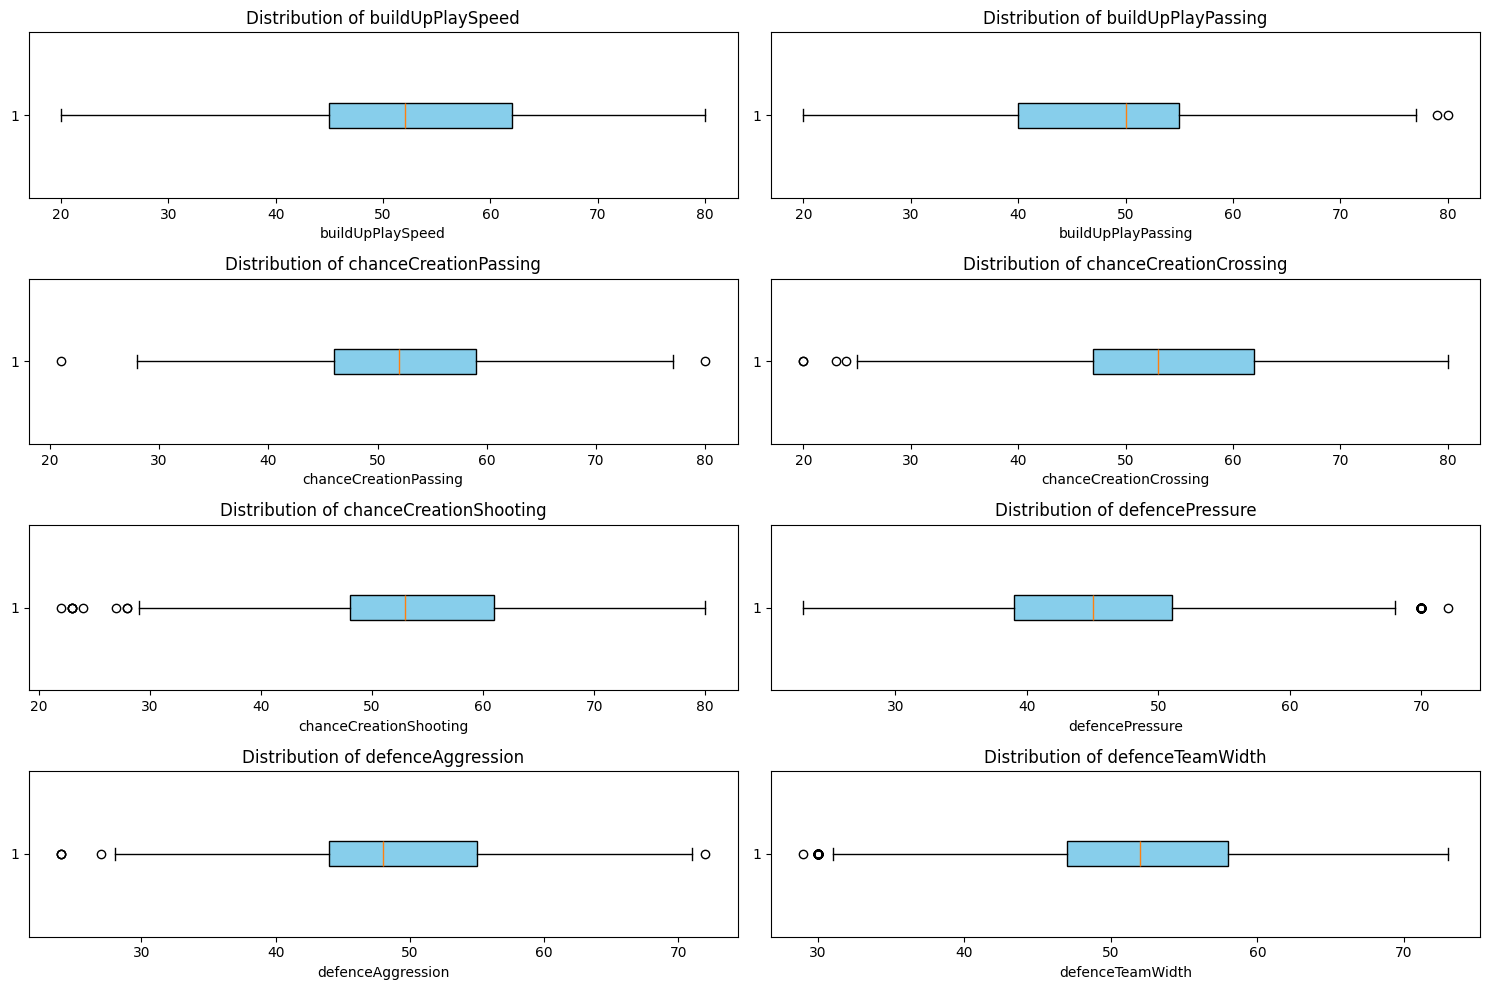

In [225]:
import matplotlib.pyplot as plt

# Liste des colonnes numériques à analyser
numerical_columns = [
    'buildUpPlaySpeed',
    'buildUpPlayPassing',
    'chanceCreationPassing',
    'chanceCreationCrossing',
    'chanceCreationShooting',
    'defencePressure',
    'defenceAggression',
    'defenceTeamWidth'
]

# Création des Box Plots pour chaque colonne numérique
plt.figure(figsize=(15, 10))  # Taille de la figure
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(4, 2, i)  # Arrangement des graphiques (4 lignes, 2 colonnes)
    plt.boxplot(df_merge_team_and_team_attributes[col].dropna(), vert=False, patch_artist=True, boxprops=dict(facecolor='skyblue'))
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)

plt.tight_layout()  # Ajustement pour éviter le chevauchement
plt.show()


In [226]:
columns_with_outliers = [
    'buildUpPlayPassing',
    'chanceCreationCrossing',
    'chanceCreationShooting',
    'defencePressure',
    'defenceAggression'
]

for col in columns_with_outliers:
    df_merge_team_and_team_attributes[col].fillna(df_merge_team_and_team_attributes[col].median(), inplace=True)

columns_no_outliers = [
    'buildUpPlaySpeed',
    'buildUpPlayPassing',
    'chanceCreationPassing',
    'defenceTeamWidth'
]

for col in columns_no_outliers:
    df_merge_team_and_team_attributes[col].fillna(df_merge_team_and_team_attributes[col].mean(), inplace=True)

print(df_merge_team_and_team_attributes.isnull().sum())


id                         0
team_api_id                0
team_long_name             0
date                      11
buildUpPlaySpeed           0
buildUpPlayPassing         0
chanceCreationPassing      0
chanceCreationCrossing     0
chanceCreationShooting     0
defencePressure            0
defenceAggression          0
defenceTeamWidth           0
dtype: int64


/tmp/ipykernel_196910/2732952566.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_merge_team_and_team_attributes[col].fillna(df_merge_team_and_team_attributes[col].median(), inplace=True)
/tmp/ipykernel_196910/2732952566.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

F

In [227]:
df_merge_team_and_team_attributes['date'] = pd.to_datetime(df_merge_team_and_team_attributes['date'], errors='coerce')  


In [228]:
df_merge_team_and_team_attributes['date'] = df_merge_team_and_team_attributes['date'].fillna(method='ffill')


/tmp/ipykernel_196910/3687141682.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_merge_team_and_team_attributes['date'] = df_merge_team_and_team_attributes['date'].fillna(method='ffill')


In [229]:
print(df_merge_team_and_team_attributes.isnull().sum())


id                        0
team_api_id               0
team_long_name            0
date                      0
buildUpPlaySpeed          0
buildUpPlayPassing        0
chanceCreationPassing     0
chanceCreationCrossing    0
chanceCreationShooting    0
defencePressure           0
defenceAggression         0
defenceTeamWidth          0
dtype: int64


In [230]:
df_merge_team_and_team_attributes.to_csv('df_merge_team_and_team_attributes.csv', index=False)


## ------------- tableau final :  ""df_merge_team_and_team_attributes""" ------

# 1-5- player

In [231]:
df_Player.head()

,id,player_api_id,player_name,player_fifa_api_id,birthday,height,weight
0,1,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187
1,2,155782,Aaron Cresswell,189615,1989-12-15 00:00:00,170.18,146
2,3,162549,Aaron Doran,186170,1991-05-13 00:00:00,170.18,163
3,4,30572,Aaron Galindo,140161,1982-05-08 00:00:00,182.88,198
4,5,23780,Aaron Hughes,17725,1979-11-08 00:00:00,182.88,154


In [232]:
df_Player.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11060 entries, 0 to 11059
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  11060 non-null  int64  
 1   player_api_id       11060 non-null  int64  
 2   player_name         11060 non-null  object 
 3   player_fifa_api_id  11060 non-null  int64  
 4   birthday            11060 non-null  object 
 5   height              11060 non-null  float64
 6   weight              11060 non-null  int64  
dtypes: float64(1), int64(4), object(2)
memory usage: 605.0+ KB


## &&&&clean player&&&&&

In [233]:
from datetime import datetime

df_Player['birthday'] = pd.to_datetime(df_Player['birthday'])


In [234]:
# supprimer 'player_fifa_api_id'
df_Player  = df_Player.drop(columns='player_fifa_api_id')

In [235]:
df_Player['height'] = df_Player['height'] / 100

In [236]:
df_Player.isnull().sum()

id               0
player_api_id    0
player_name      0
birthday         0
height           0
weight           0
dtype: int64

In [237]:
df_Player.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11060 entries, 0 to 11059
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             11060 non-null  int64         
 1   player_api_id  11060 non-null  int64         
 2   player_name    11060 non-null  object        
 3   birthday       11060 non-null  datetime64[ns]
 4   height         11060 non-null  float64       
 5   weight         11060 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(3), object(1)
memory usage: 518.6+ KB


## 1-5-player_attributes

In [238]:
df_player_attributtes.head()

,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,1,218353,505942,2016-02-18 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,2,218353,505942,2015-11-19 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,3,218353,505942,2015-09-21 00:00:00,62.0,66.0,right,medium,medium,49.0,...,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
3,4,218353,505942,2015-03-20 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
4,5,218353,505942,2007-02-22 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0


In [239]:
df_player_attributtes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183978 entries, 0 to 183977
Data columns (total 42 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   id                   183978 non-null  int64  
 1   player_fifa_api_id   183978 non-null  int64  
 2   player_api_id        183978 non-null  int64  
 3   date                 183978 non-null  object 
 4   overall_rating       183142 non-null  float64
 5   potential            183142 non-null  float64
 6   preferred_foot       183142 non-null  object 
 7   attacking_work_rate  180748 non-null  object 
 8   defensive_work_rate  183142 non-null  object 
 9   crossing             183142 non-null  float64
 10  finishing            183142 non-null  float64
 11  heading_accuracy     183142 non-null  float64
 12  short_passing        183142 non-null  float64
 13  volleys              181265 non-null  float64
 14  dribbling            183142 non-null  float64
 15  curve            

In [240]:
columns_select = [
    'player_api_id', 'overall_rating', 'potential','preferred_foot', 'finishing', 'dribbling',
    'shot_power', 'marking', 'standing_tackle', 'interceptions', 
    'short_passing', 'stamina', 'strength', 'balance'
]
df_player_attributtes_clean = df_player_attributtes[columns_select]


In [241]:
df_player_attributtes_clean.head()

,player_api_id,overall_rating,potential,preferred_foot,finishing,dribbling,shot_power,marking,standing_tackle,interceptions,short_passing,stamina,strength,balance
0,505942,67.0,71.0,right,44.0,51.0,55.0,65.0,69.0,70.0,61.0,54.0,76.0,65.0
1,505942,67.0,71.0,right,44.0,51.0,55.0,65.0,69.0,70.0,61.0,54.0,76.0,65.0
2,505942,62.0,66.0,right,44.0,51.0,55.0,65.0,66.0,41.0,61.0,54.0,76.0,65.0
3,505942,61.0,65.0,right,43.0,50.0,54.0,62.0,63.0,40.0,60.0,54.0,76.0,65.0
4,505942,61.0,65.0,right,43.0,50.0,54.0,62.0,63.0,40.0,60.0,54.0,76.0,65.0


In [242]:
df_player_attributtes_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183978 entries, 0 to 183977
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   player_api_id    183978 non-null  int64  
 1   overall_rating   183142 non-null  float64
 2   potential        183142 non-null  float64
 3   preferred_foot   183142 non-null  object 
 4   finishing        183142 non-null  float64
 5   dribbling        183142 non-null  float64
 6   shot_power       183142 non-null  float64
 7   marking          183142 non-null  float64
 8   standing_tackle  183142 non-null  float64
 9   interceptions    183142 non-null  float64
 10  short_passing    183142 non-null  float64
 11  stamina          183142 non-null  float64
 12  strength         183142 non-null  float64
 13  balance          181265 non-null  float64
dtypes: float64(12), int64(1), object(1)
memory usage: 19.7+ MB


##  ===== merge : (player & player_attributtes) df_Player & df_player_attributtes_clean

In [243]:
df_merge_player_attributtes_clean= df_Player.merge(df_player_attributtes_clean, on='player_api_id', how='left')

In [244]:
df_merge_player_attributtes_clean.head()

,id,player_api_id,player_name,birthday,height,weight,overall_rating,potential,preferred_foot,finishing,dribbling,shot_power,marking,standing_tackle,interceptions,short_passing,stamina,strength,balance
0,1,505942,Aaron Appindangoye,1992-02-29,1.8288,187,67.0,71.0,right,44.0,51.0,55.0,65.0,69.0,70.0,61.0,54.0,76.0,65.0
1,1,505942,Aaron Appindangoye,1992-02-29,1.8288,187,67.0,71.0,right,44.0,51.0,55.0,65.0,69.0,70.0,61.0,54.0,76.0,65.0
2,1,505942,Aaron Appindangoye,1992-02-29,1.8288,187,62.0,66.0,right,44.0,51.0,55.0,65.0,66.0,41.0,61.0,54.0,76.0,65.0
3,1,505942,Aaron Appindangoye,1992-02-29,1.8288,187,61.0,65.0,right,43.0,50.0,54.0,62.0,63.0,40.0,60.0,54.0,76.0,65.0
4,1,505942,Aaron Appindangoye,1992-02-29,1.8288,187,61.0,65.0,right,43.0,50.0,54.0,62.0,63.0,40.0,60.0,54.0,76.0,65.0


In [245]:
df_merge_player_attributtes_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183978 entries, 0 to 183977
Data columns (total 19 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   id               183978 non-null  int64         
 1   player_api_id    183978 non-null  int64         
 2   player_name      183978 non-null  object        
 3   birthday         183978 non-null  datetime64[ns]
 4   height           183978 non-null  float64       
 5   weight           183978 non-null  int64         
 6   overall_rating   183142 non-null  float64       
 7   potential        183142 non-null  float64       
 8   preferred_foot   183142 non-null  object        
 9   finishing        183142 non-null  float64       
 10  dribbling        183142 non-null  float64       
 11  shot_power       183142 non-null  float64       
 12  marking          183142 non-null  float64       
 13  standing_tackle  183142 non-null  float64       
 14  interceptions    183

In [246]:
missing_value = (df_merge_player_attributtes_clean.isnull().sum() / len(df_merge_player_attributtes_clean) * 100)
missing_value

id                 0.000000
player_api_id      0.000000
player_name        0.000000
birthday           0.000000
height             0.000000
weight             0.000000
overall_rating     0.454402
potential          0.454402
preferred_foot     0.454402
finishing          0.454402
dribbling          0.454402
shot_power         0.454402
marking            0.454402
standing_tackle    0.454402
interceptions      0.454402
short_passing      0.454402
stamina            0.454402
strength           0.454402
balance            1.474633
dtype: float64

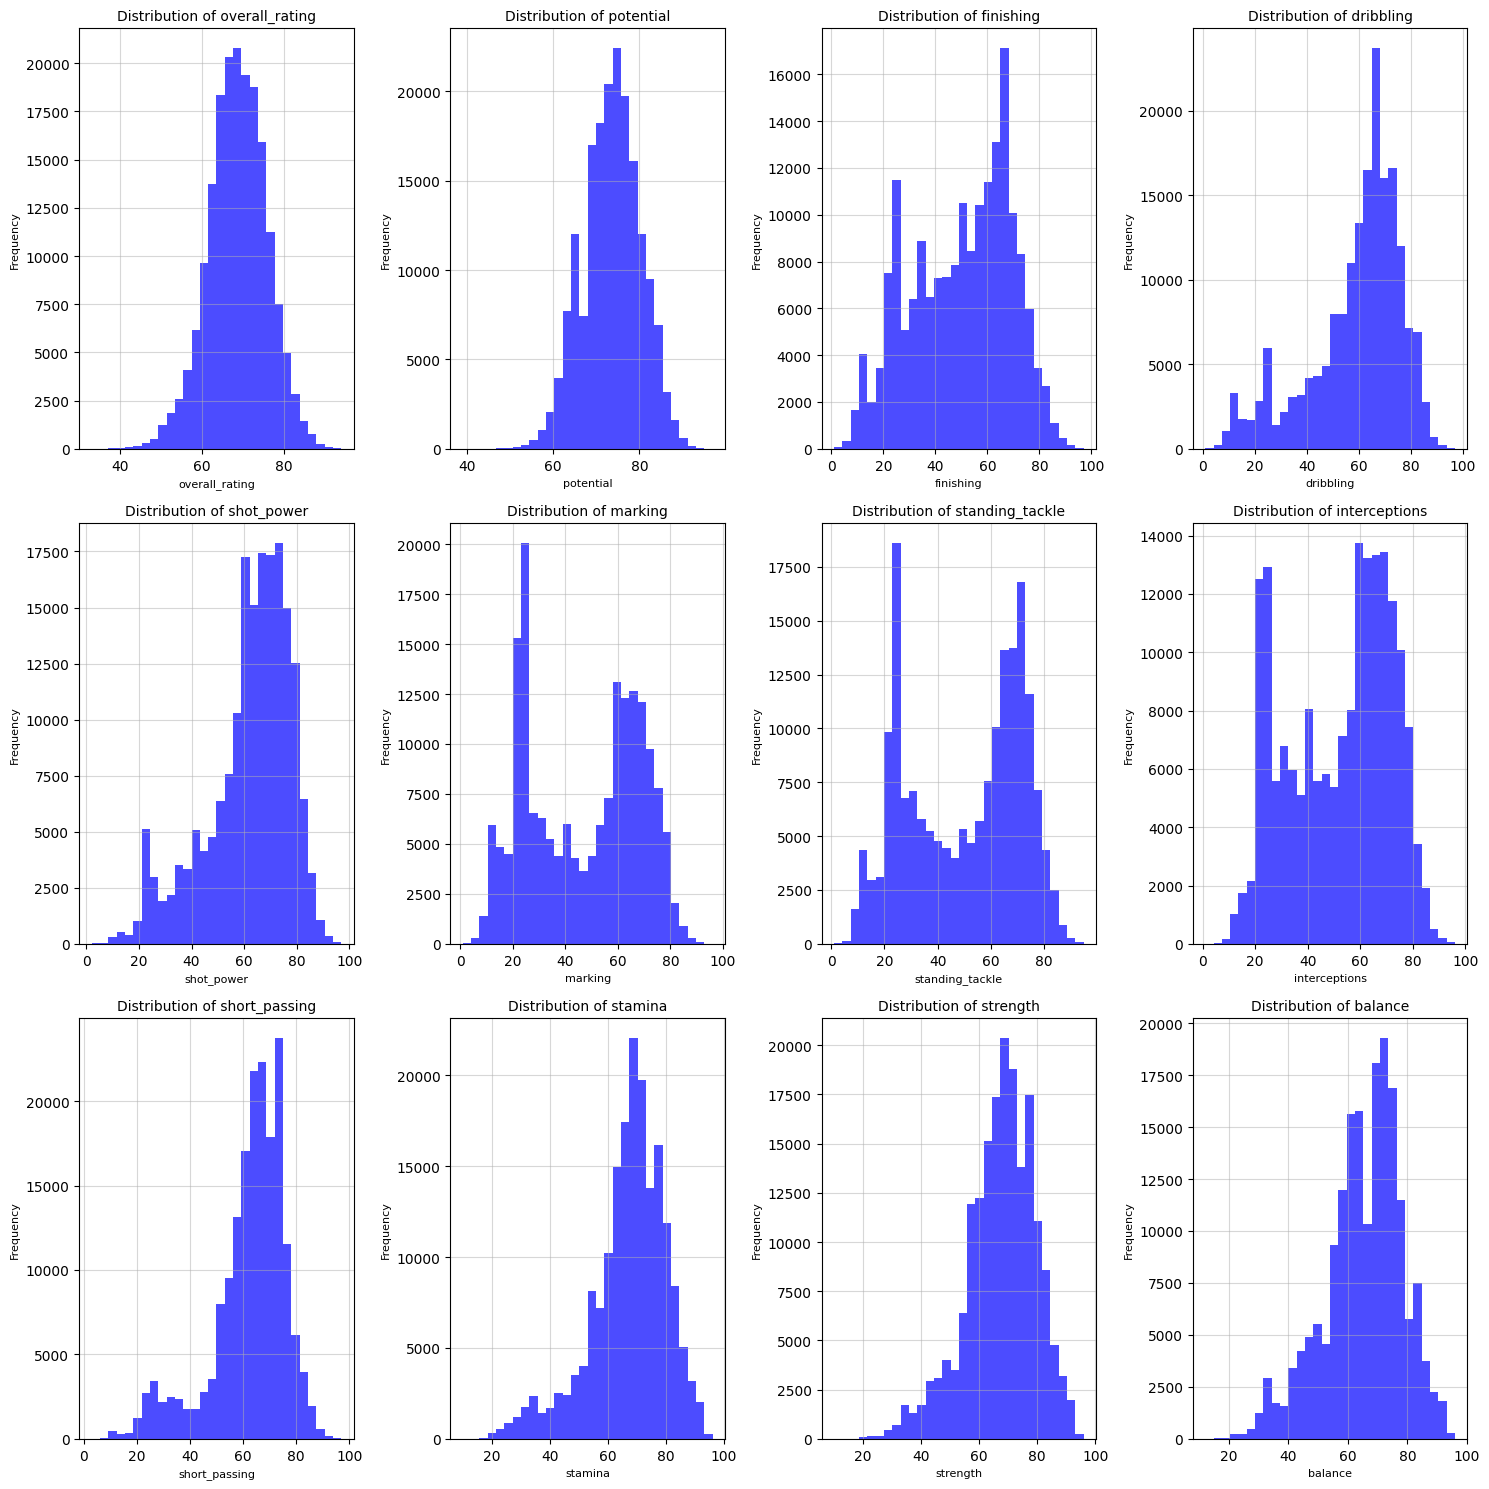

In [ ]:
import matplotlib.pyplot as plt

columns_to_visualize = [
    'overall_rating', 'potential', 'finishing', 'dribbling', 'shot_power',
    'marking', 'standing_tackle', 'interceptions', 'short_passing', 
    'stamina', 'strength', 'balance'
]

n_cols = 4
n_rows = (len(columns_to_visualize) + n_cols - 1) // n_cols  

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows))
axes = axes.flatten() 

for i, column in enumerate(columns_to_visualize):
    ax = axes[i]
    ax.hist(df_merge_player_attributtes_clean[column].dropna(), bins=30, alpha=0.7, color='blue')
    ax.set_title(f'Distribution of {column}', fontsize=10)
    ax.set_xlabel(column, fontsize=8)
    ax.set_ylabel('Frequency', fontsize=8)
    ax.grid(True, alpha=0.5)

for j in range(len(columns_to_visualize), len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()


In [ ]:
columns_to_fill_mean = [
    'overall_rating', 'potential', 'marking', 'standing_tackle', 
    'interceptions', 'short_passing', 'stamina', 'strength', 'balance'
]
for col in columns_to_fill_mean:
    df_merge_player_attributtes_clean[col].fillna(df_merge_player_attributtes_clean[col].mean(), inplace=True)

columns_to_fill_median = ['finishing', 'dribbling', 'shot_power']
for col in columns_to_fill_median:
    df_merge_player_attributtes_clean[col].fillna(df_merge_player_attributtes_clean[col].median(), inplace=True)

df_merge_player_attributtes_clean['preferred_foot'].fillna(
    df_merge_player_attributtes_clean['preferred_foot'].mode()[0], inplace=True)


/tmp/ipykernel_196910/2686232722.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_merge_player_attributtes_clean[col].fillna(df_merge_player_attributtes_clean[col].mean(), inplace=True)
/tmp/ipykernel_196910/2686232722.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For 

In [250]:
df_merge_player_attributtes_clean

,id,player_api_id,player_name,birthday,height,weight,overall_rating,potential,preferred_foot,finishing,dribbling,shot_power,marking,standing_tackle,interceptions,short_passing,stamina,strength,balance
0,1,505942,Aaron Appindangoye,1992-02-29,1.8288,187,67.0,71.0,right,44.0,51.0,55.0,65.0,69.0,70.0,61.0,54.0,76.0,65.0
1,1,505942,Aaron Appindangoye,1992-02-29,1.8288,187,67.0,71.0,right,44.0,51.0,55.0,65.0,69.0,70.0,61.0,54.0,76.0,65.0
2,1,505942,Aaron Appindangoye,1992-02-29,1.8288,187,62.0,66.0,right,44.0,51.0,55.0,65.0,66.0,41.0,61.0,54.0,76.0,65.0
3,1,505942,Aaron Appindangoye,1992-02-29,1.8288,187,61.0,65.0,right,43.0,50.0,54.0,62.0,63.0,40.0,60.0,54.0,76.0,65.0
4,1,505942,Aaron Appindangoye,1992-02-29,1.8288,187,61.0,65.0,right,43.0,50.0,54.0,62.0,63.0,40.0,60.0,54.0,76.0,65.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183973,11075,39902,Zvjezdan Misimovic,1982-06-05,1.8034,176,83.0,85.0,right,77.0,84.0,76.0,22.0,31.0,78.0,89.0,72.0,67.0,73.0
183974,11075,39902,Zvjezdan Misimovic,1982-06-05,1.8034,176,78.0,80.0,right,76.0,85.0,75.0,32.0,31.0,64.0,84.0,66.0,65.0,73.0
183975,11075,39902,Zvjezdan Misimovic,1982-06-05,1.8034,176,77.0,80.0,right,71.0,85.0,75.0,32.0,31.0,64.0,84.0,66.0,65.0,73.0
183976,11075,39902,Zvjezdan Misimovic,1982-06-05,1.8034,176,78.0,81.0,right,64.0,87.0,72.0,28.0,32.0,63.0,86.0,67.0,59.0,73.0


In [251]:
df_merge_player_attributtes_clean.isnull().sum()

id                 0
player_api_id      0
player_name        0
birthday           0
height             0
weight             0
overall_rating     0
potential          0
preferred_foot     0
finishing          0
dribbling          0
shot_power         0
marking            0
standing_tackle    0
interceptions      0
short_passing      0
stamina            0
strength           0
balance            0
dtype: int64

In [252]:
#
df_merge_player_attributtes_clean.to_csv('df_merge_player_attributtes_clean.csv', index=False)


## 1- 7 - Match 

In [253]:
df_match.head()

,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,...,SJA,VCH,VCD,VCA,GBH,GBD,GBA,BSH,BSD,BSA
0,1,1,1,2008/2009,1,2008-08-17 00:00:00,492473,9987,9993,1,...,4.00,1.65,3.40,4.50,1.78,3.25,4.00,1.73,3.40,4.20
1,2,1,1,2008/2009,1,2008-08-16 00:00:00,492474,10000,9994,0,...,3.80,2.00,3.25,3.25,1.85,3.25,3.75,1.91,3.25,3.60
2,3,1,1,2008/2009,1,2008-08-16 00:00:00,492475,9984,8635,0,...,2.50,2.35,3.25,2.65,2.50,3.20,2.50,2.30,3.20,2.75
3,4,1,1,2008/2009,1,2008-08-17 00:00:00,492476,9991,9998,5,...,7.50,1.45,3.75,6.50,1.50,3.75,5.50,1.44,3.75,6.50
4,5,1,1,2008/2009,1,2008-08-16 00:00:00,492477,7947,9985,1,...,1.73,4.50,3.40,1.65,4.50,3.50,1.65,4.75,3.30,1.67


In [254]:
df_match.sample(5)

,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,...,SJA,VCH,VCD,VCA,GBH,GBD,GBA,BSH,BSD,BSA
22026,22027,21518,21518,2009/2010,20,2010-01-31 00:00:00,684903,9906,9864,0,...,7.0,1.53,3.75,6.50,1.50,3.8,6.75,1.50,4.00,6.5
20441,20442,19694,19694,2011/2012,19,2011-12-17 00:00:00,1024474,8548,8066,2,...,13.0,1.25,6.00,15.00,1.25,5.0,11.00,1.22,5.75,12.0
9680,9681,7809,7809,2014/2015,13,2014-11-29 00:00:00,1732829,10189,9905,4,...,NaN,1.95,3.70,3.90,NaN,NaN,NaN,NaN,NaN,NaN
24251,24252,21518,21518,2015/2016,16,2016-02-17 00:00:00,2030237,9869,8634,1,...,NaN,21.00,9.00,1.14,NaN,NaN,NaN,NaN,NaN,NaN
20981,20982,19694,19694,2013/2014,31,2014-03-25 00:00:00,1474530,8649,8485,1,...,1.8,4.60,3.80,1.75,NaN,NaN,NaN,NaN,NaN,NaN


In [255]:
df_match.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25979 entries, 0 to 25978
Columns: 115 entries, id to BSA
dtypes: float64(96), int64(9), object(10)
memory usage: 22.8+ MB


In [256]:
df_match.describe()

,id,country_id,league_id,stage,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,home_player_X1,...,SJA,VCH,VCD,VCA,GBH,GBD,GBA,BSH,BSD,BSA
count,25979.000000,25979.000000,25979.000000,25979.000000,2.597900e+04,25979.000000,25979.000000,25979.000000,25979.000000,24158.000000,...,17097.000000,22568.000000,22568.000000,22568.000000,14162.000000,14162.000000,14162.000000,14161.000000,14161.000000,14161.000000
mean,12990.000000,11738.630317,11738.630317,18.242773,1.195429e+06,9984.371993,9984.475115,1.544594,1.160938,0.999586,...,4.622343,2.668107,3.899048,4.840281,2.498764,3.648189,4.353097,2.497894,3.660742,4.405663
std,7499.635658,7553.936759,7553.936759,10.407354,4.946279e+05,14087.453758,14087.445135,1.297158,1.142110,0.022284,...,3.632164,1.928753,1.248221,4.318338,1.489299,0.867440,3.010189,1.507793,0.868272,3.189814
min,1.000000,1.000000,1.000000,1.000000,4.831290e+05,1601.000000,1601.000000,0.000000,0.000000,0.000000,...,1.100000,1.030000,1.620000,1.080000,1.050000,1.450000,1.120000,1.040000,1.330000,1.120000
25%,6495.500000,4769.000000,4769.000000,9.000000,7.684365e+05,8475.000000,8475.000000,1.000000,0.000000,1.000000,...,2.500000,1.700000,3.300000,2.550000,1.670000,3.200000,2.500000,1.670000,3.250000,2.500000
50%,12990.000000,10257.000000,10257.000000,18.000000,1.147511e+06,8697.000000,8697.000000,1.000000,1.000000,1.000000,...,3.500000,2.150000,3.500000,3.500000,2.100000,3.300000,3.400000,2.100000,3.400000,3.400000
75%,19484.500000,17642.000000,17642.000000,27.000000,1.709852e+06,9925.000000,9925.000000,2.000000,2.000000,1.000000,...,5.250000,2.800000,4.000000,5.400000,2.650000,3.750000,5.000000,2.620000,3.750000,5.000000
max,25979.000000,24558.000000,24558.000000,38.000000,2.216672e+06,274581.000000,274581.000000,10.000000,9.000000,2.000000,...,41.000000,36.000000,26.000000,67.000000,21.000000,11.000000,34.000000,17.000000,13.000000,34.000000


In [257]:
tout =  df_match.columns.tolist()
tout


['id',
 'country_id',
 'league_id',
 'season',
 'stage',
 'date',
 'match_api_id',
 'home_team_api_id',
 'away_team_api_id',
 'home_team_goal',
 'away_team_goal',
 'home_player_X1',
 'home_player_X2',
 'home_player_X3',
 'home_player_X4',
 'home_player_X5',
 'home_player_X6',
 'home_player_X7',
 'home_player_X8',
 'home_player_X9',
 'home_player_X10',
 'home_player_X11',
 'away_player_X1',
 'away_player_X2',
 'away_player_X3',
 'away_player_X4',
 'away_player_X5',
 'away_player_X6',
 'away_player_X7',
 'away_player_X8',
 'away_player_X9',
 'away_player_X10',
 'away_player_X11',
 'home_player_Y1',
 'home_player_Y2',
 'home_player_Y3',
 'home_player_Y4',
 'home_player_Y5',
 'home_player_Y6',
 'home_player_Y7',
 'home_player_Y8',
 'home_player_Y9',
 'home_player_Y10',
 'home_player_Y11',
 'away_player_Y1',
 'away_player_Y2',
 'away_player_Y3',
 'away_player_Y4',
 'away_player_Y5',
 'away_player_Y6',
 'away_player_Y7',
 'away_player_Y8',
 'away_player_Y9',
 'away_player_Y10',
 'away_player

In [258]:

df_match_select = df_match[[ 
    'id', 'country_id', 'league_id', 'season', 'date', 'stage', 'match_api_id', 'home_team_api_id',
    'home_team_goal', 'away_team_goal', 'away_team_api_id',


    'home_player_1','home_player_2','home_player_3','home_player_4','home_player_5',
    'home_player_6','home_player_7','home_player_8','home_player_9','home_player_10',
    'home_player_11',

    'away_player_1','away_player_2','away_player_3','away_player_4','away_player_5',
    'away_player_6','away_player_7','away_player_8','away_player_9','away_player_10',
    'away_player_11',
 
    'possession','goal'
]]

In [259]:
df_match_select


,id,country_id,league_id,season,date,stage,match_api_id,home_team_api_id,home_team_goal,away_team_goal,...,away_player_4,away_player_5,away_player_6,away_player_7,away_player_8,away_player_9,away_player_10,away_player_11,possession,goal
0,1,1,1,2008/2009,2008-08-17 00:00:00,1,492473,9987,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None
1,2,1,1,2008/2009,2008-08-16 00:00:00,1,492474,10000,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None
2,3,1,1,2008/2009,2008-08-16 00:00:00,1,492475,9984,0,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None
3,4,1,1,2008/2009,2008-08-17 00:00:00,1,492476,9991,5,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None
4,5,1,1,2008/2009,2008-08-16 00:00:00,1,492477,7947,1,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25974,25975,24558,24558,2015/2016,2015-09-22 00:00:00,9,1992091,10190,1,0,...,67304.0,158253.0,133126.0,186524.0,93223.0,121115.0,232110.0,289732.0,None,None
25975,25976,24558,24558,2015/2016,2015-09-23 00:00:00,9,1992092,9824,1,2,...,178119.0,27232.0,570830.0,260708.0,201704.0,36382.0,34082.0,95257.0,None,None
25976,25977,24558,24558,2015/2016,2015-09-23 00:00:00,9,1992093,9956,2,0,...,32597.0,114794.0,188114.0,25840.0,482200.0,95230.0,451335.0,275122.0,None,None
25977,25978,24558,24558,2015/2016,2015-09-22 00:00:00,9,1992094,7896,0,0,...,260964.0,231614.0,113235.0,41116.0,462608.0,42262.0,92252.0,194532.0,None,None


In [260]:
df_match_select.isnull().sum()

id                      0
country_id              0
league_id               0
season                  0
date                    0
stage                   0
match_api_id            0
home_team_api_id        0
home_team_goal          0
away_team_goal          0
away_team_api_id        0
home_player_1        1224
home_player_2        1315
home_player_3        1281
home_player_4        1323
home_player_5        1316
home_player_6        1325
home_player_7        1227
home_player_8        1309
home_player_9        1273
home_player_10       1436
home_player_11       1555
away_player_1        1234
away_player_2        1278
away_player_3        1293
away_player_4        1321
away_player_5        1335
away_player_6        1313
away_player_7        1235
away_player_8        1341
away_player_9        1328
away_player_10       1441
away_player_11       1554
possession          11762
goal                11762
dtype: int64

In [261]:
df_match_select['goal'].unique()

array([None,
       '<goal><value><comment>n</comment><stats><goals>1</goals><shoton>1</shoton></stats><event_incident_typefk>406</event_incident_typefk><elapsed>22</elapsed><player2>38807</player2><subtype>header</subtype><player1>37799</player1><sortorder>5</sortorder><team>10261</team><id>378998</id><n>295</n><type>goal</type><goal_type>n</goal_type></value><value><comment>n</comment><stats><goals>1</goals><shoton>1</shoton></stats><event_incident_typefk>393</event_incident_typefk><elapsed>24</elapsed><player2>24154</player2><subtype>shot</subtype><player1>24148</player1><sortorder>4</sortorder><team>10260</team><id>379019</id><n>298</n><type>goal</type><goal_type>n</goal_type></value></goal>',
       '<goal><value><comment>n</comment><stats><goals>1</goals><shoton>1</shoton></stats><event_incident_typefk>393</event_incident_typefk><elapsed>4</elapsed><player2>39297</player2><subtype>shot</subtype><player1>26181</player1><sortorder>2</sortorder><team>9825</team><id>375546</id><n>231

In [262]:
df_match_select['possession'].unique()

array([None,
       '<possession><value><comment>56</comment><event_incident_typefk>352</event_incident_typefk><elapsed>25</elapsed><subtype>possession</subtype><sortorder>1</sortorder><awaypos>44</awaypos><homepos>56</homepos><n>68</n><type>special</type><id>379029</id></value><value><comment>54</comment><elapsed_plus>1</elapsed_plus><event_incident_typefk>352</event_incident_typefk><elapsed>45</elapsed><subtype>possession</subtype><sortorder>4</sortorder><awaypos>46</awaypos><homepos>54</homepos><n>117</n><type>special</type><id>379251</id></value><value><comment>54</comment><event_incident_typefk>352</event_incident_typefk><elapsed>70</elapsed><subtype>possession</subtype><sortorder>0</sortorder><awaypos>46</awaypos><homepos>54</homepos><n>190</n><type>special</type><id>379443</id></value><value><comment>55</comment><elapsed_plus>5</elapsed_plus><event_incident_typefk>352</event_incident_typefk><elapsed>90</elapsed><subtype>possession</subtype><sortorder>1</sortorder><awaypos>45</aw

In [ ]:
import xml.etree.ElementTree as ET
possession_table =df_match_select.dropna(subset=['possession'])
possession = possession_table[possession_table['possession'].str.strip() != '<possession />']

possession = possession['possession']
goal_table = df_match_select.dropna(subset=['goal'])
goal = goal_table['goal']
def parse_possession_data(xml_data):
    try:
        root = ET.fromstring(xml_data) 
    except ET.ParseError as e:
        print(f"Error parsing XML: {e}")
        return pd.DataFrame() 

    possession_data = []
    
    for value in root.findall('value'):
        possession_info = {
            'AwayPos': value.find('awaypos').text if value.find('awaypos') is not None else None,
            'HomePos': value.find('homepos').text if value.find('homepos') is not None else None,

        }
        possession_data.append(possession_info)
    
    df_possession = pd.DataFrame(possession_data)  
    return df_possession
    
def parse_goals_to_table(xml_data):
    root = ET.fromstring(xml_data)
    
    goal_data = []
    
    for value in root.findall('value'):
        goal_info = {}
        
        goal_info['goals'] = value.find('stats/goals').text if value.find('stats/goals') is not None else None
        goal_info['shoton'] = value.find('stats/shoton').text if value.find('stats/shoton') is not None else None
        goal_info['goal_scor'] = value.find('player1').text if value.find('player1') is not None else None
        goal_info['assist'] = value.find('player2').text if value.find('player2') is not None else None
        goal_info['subtype'] = value.find('subtype').text if value.find('subtype') is not None else None
        goal_info['team'] = value.find('team').text if value.find('team') is not None else None
        
        if goal_info:
            goal_data.append(goal_info)
    df = pd.DataFrame(goal_data)
    return df
all_goals_tables = []
all_possession_tables = []
for i, s in enumerate(goal):
    df2 = parse_goals_to_table(s)
    df2['id_match'] = goal_table.index[i]
    all_goals_tables.append(df2)
final_goals_table = pd.concat(all_goals_tables, ignore_index=True)





for i, s in enumerate(possession):
    df2 = parse_possession_data(s)
    if not df2.empty:
        df2['id_match'] = possession_table.index[i]
        all_possession_tables.append(df2)

final_possession_table = pd.concat(all_possession_tables, ignore_index=True, sort=False)

In [264]:
final_possession_table

,AwayPos,HomePos,id_match
0,44,56,1728
1,46,54,1728
2,46,54,1728
3,45,55,1728
4,35,65,1729
...,...,...,...
34810,55,45,11161
34811,41,59,11162
34812,39,61,11162
34813,40,60,11162


In [265]:
final_possession_table.isnull().sum()

AwayPos     19
HomePos     19
id_match     0
dtype: int64

In [266]:
final_goals_table.head()


,goals,shoton,goal_scor,assist,subtype,team,id_match
0,1,1,37799,38807,header,10261,1728
1,1,1,24148,24154,shot,10260,1728
2,1,1,26181,39297,shot,9825,1729
3,1,1,30853,30889,distance,8650,1730
4,1,1,23139,36394,shot,8654,1731


In [267]:
final_goals_table.isnull().sum()

goals         4751
shoton        5432
goal_scor      117
assist       22911
subtype      18429
team            34
id_match         0
dtype: int64

##  = = == = = = = =  merge  3 table :  match , goal_assit,  possession

In [268]:
df_match_select.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25979 entries, 0 to 25978
Data columns (total 35 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                25979 non-null  int64  
 1   country_id        25979 non-null  int64  
 2   league_id         25979 non-null  int64  
 3   season            25979 non-null  object 
 4   date              25979 non-null  object 
 5   stage             25979 non-null  int64  
 6   match_api_id      25979 non-null  int64  
 7   home_team_api_id  25979 non-null  int64  
 8   home_team_goal    25979 non-null  int64  
 9   away_team_goal    25979 non-null  int64  
 10  away_team_api_id  25979 non-null  int64  
 11  home_player_1     24755 non-null  float64
 12  home_player_2     24664 non-null  float64
 13  home_player_3     24698 non-null  float64
 14  home_player_4     24656 non-null  float64
 15  home_player_5     24663 non-null  float64
 16  home_player_6     24654 non-null  float6

In [269]:
df_match_select.rename(columns={"id": "id_match"}, inplace=True)


/tmp/ipykernel_196910/725609959.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_match_select.rename(columns={"id": "id_match"}, inplace=True)


## match 

In [270]:
df_match_select.head()

,id_match,country_id,league_id,season,date,stage,match_api_id,home_team_api_id,home_team_goal,away_team_goal,...,away_player_4,away_player_5,away_player_6,away_player_7,away_player_8,away_player_9,away_player_10,away_player_11,possession,goal
0,1,1,1,2008/2009,2008-08-17 00:00:00,1,492473,9987,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None
1,2,1,1,2008/2009,2008-08-16 00:00:00,1,492474,10000,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None
2,3,1,1,2008/2009,2008-08-16 00:00:00,1,492475,9984,0,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None
3,4,1,1,2008/2009,2008-08-17 00:00:00,1,492476,9991,5,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None
4,5,1,1,2008/2009,2008-08-16 00:00:00,1,492477,7947,1,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None


In [271]:
df_match_select.rename(columns={"id": "id_match"}, inplace=True)


/tmp/ipykernel_196910/725609959.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_match_select.rename(columns={"id": "id_match"}, inplace=True)


In [272]:
merged_df_possession = pd.merge(df_match_select, final_possession_table, on="id_match", how="inner")


In [273]:
merged_df_possession.head()

,id_match,country_id,league_id,season,date,stage,match_api_id,home_team_api_id,home_team_goal,away_team_goal,...,away_player_6,away_player_7,away_player_8,away_player_9,away_player_10,away_player_11,possession,goal,AwayPos,HomePos
0,1728,1,1,2015/2016,2015-09-26 00:00:00,9,1979895,8475,1,3,...,173449.0,40521.0,25751.0,289248.0,282671.0,467486.0,None,None,44,56
1,1728,1,1,2015/2016,2015-09-26 00:00:00,9,1979895,8475,1,3,...,173449.0,40521.0,25751.0,289248.0,282671.0,467486.0,None,None,46,54
2,1728,1,1,2015/2016,2015-09-26 00:00:00,9,1979895,8475,1,3,...,173449.0,40521.0,25751.0,289248.0,282671.0,467486.0,None,None,46,54
3,1728,1,1,2015/2016,2015-09-26 00:00:00,9,1979895,8475,1,3,...,173449.0,40521.0,25751.0,289248.0,282671.0,467486.0,None,None,45,55
4,1729,1729,1729,2008/2009,2008-08-17 00:00:00,1,489042,10260,1,1,...,38807.0,40565.0,30360.0,33852.0,34574.0,37799.0,<possession><value><comment>56</comment><event...,<goal><value><comment>n</comment><stats><goals...,35,65


In [274]:
merged_df_possession.isnull().sum()

id_match              0
country_id            0
league_id             0
season                0
date                  0
stage                 0
match_api_id          0
home_team_api_id      0
home_team_goal        0
away_team_goal        0
away_team_api_id      0
home_player_1        62
home_player_2        63
home_player_3        46
home_player_4        60
home_player_5        50
home_player_6        42
home_player_7        71
home_player_8        79
home_player_9        36
home_player_10      114
home_player_11       81
away_player_1        59
away_player_2        87
away_player_3        22
away_player_4        62
away_player_5        70
away_player_6        73
away_player_7        75
away_player_8        78
away_player_9        50
away_player_10      109
away_player_11      111
possession           58
goal                 58
AwayPos              19
HomePos              19
dtype: int64

In [ ]:
merged_df_possession = pd.merge(
    merged_df_possession,
    df_Team_1[['team_api_id', 'team_long_name']],
    left_on='home_team_api_id',
    right_on='team_api_id',
    how='left'
)
merged_df_possession.rename(columns={'team_long_name': 'home_team_name'}, inplace=True)

merged_df_possession = pd.merge(
    merged_df_possession,
    df_Team_1[['team_api_id', 'team_long_name']],
    left_on='away_team_api_id',
    right_on='team_api_id',
    how='left'
)
merged_df_possession.rename(columns={'team_long_name': 'away_team_name'}, inplace=True)

if 'team_api_id' in merged_df_possession.columns:
    merged_df_possession.drop(columns=['team_api_id'], inplace=True, errors='ignore')

for i in range(1, 12):  
    if f'home_player_{i}' in merged_df_possession.columns:
        merged_df_possession = pd.merge(
            merged_df_possession,
            df_Player[['player_api_id', 'player_name']],
            left_on=f'home_player_{i}',
            right_on='player_api_id',
            how='left'
        )
        merged_df_possession.rename(columns={'player_name': f'home_player_{i}_name'}, inplace=True)
        merged_df_possession.drop(columns=['player_api_id'], inplace=True, errors='ignore')


    if f'away_player_{i}' in merged_df_possession.columns:
        merged_df_possession = pd.merge(
            merged_df_possession,
            df_Player[['player_api_id', 'player_name']],
            left_on=f'away_player_{i}',
            right_on='player_api_id',
            how='left'
        )
        merged_df_possession.rename(columns={'player_name': f'away_player_{i}_name'}, inplace=True)
        merged_df_possession.drop(columns=['player_api_id'], inplace=True, errors='ignore')



In [276]:
merged_df_possession.sample(5)

,id_match,country_id,league_id,season,date,stage,match_api_id,home_team_api_id,home_team_goal,away_team_goal,...,home_player_7_name,away_player_7_name,home_player_8_name,away_player_8_name,home_player_9_name,away_player_9_name,home_player_10_name,away_player_10_name,home_player_11_name,away_player_11_name
6762,3389,1729,1729,2012/2013,2013-01-13 00:00:00,22,1229329,9825,0,2,...,Jack Wilshere,Gareth Barry,Alex Oxlade-Chamberlain,James Milner,Santi Cazorla,Carlos Tevez,Lukas Podolski,David Silva,Theo Walcott,Edin Dzeko
21231,7732,4769,4769,2015/2016,2016-05-07 00:00:00,37,1990093,8639,0,0,...,Ibrahim Amadou,Mustapha Diallo,Mounir Obbadi,Younousse Sankhare,Morgan Amalfitano,Thibault Giresse,Eder,Jimmy Briand,Marcos Lopes,Mevlut Erdinc
15485,6196,4769,4769,2011/2012,2012-05-01 00:00:00,35,1020205,10249,2,2,...,Marco Estrada,Eric Tie Bi,Remy Cabella,Kevin Berigaud,Younes Belhanda,Thomas Kahlenberg,Karim Ait Fana,Mohammed Rabiu,Olivier Giroud,Saber Khalifa
34054,10971,10257,10257,2009/2010,2009-09-24 00:00:00,5,704452,10233,2,2,...,Alberto Zapater,Felipe Melo,Francesco Modesto,Claudio Marchisio,Giandomenico Mesto,Mauro Camoranesi,Sergio Floccari,Amauri,Giuseppe Sculli,Vincenzo Iaquinta
7121,3477,1729,1729,2012/2013,2012-09-01 00:00:00,3,1228319,8654,3,0,...,Kevin Nolan,Damien Duff,Mohamed Diame,Steve Sidwell,Matthew Taylor,Kieran Richardson,Andy Carroll,Hugo Rodallega,Ricardo Vaz Te,Mladen Petric


In [277]:
merged_df_possession.columns

Index(['id_match', 'country_id', 'league_id', 'season', 'date', 'stage',
       'match_api_id', 'home_team_api_id', 'home_team_goal', 'away_team_goal',
       'away_team_api_id', 'home_player_1', 'home_player_2', 'home_player_3',
       'home_player_4', 'home_player_5', 'home_player_6', 'home_player_7',
       'home_player_8', 'home_player_9', 'home_player_10', 'home_player_11',
       'away_player_1', 'away_player_2', 'away_player_3', 'away_player_4',
       'away_player_5', 'away_player_6', 'away_player_7', 'away_player_8',
       'away_player_9', 'away_player_10', 'away_player_11', 'possession',
       'goal', 'AwayPos', 'HomePos', 'team_api_id_x', 'home_team_name',
       'team_api_id_y', 'away_team_name', 'home_player_1_name',
       'away_player_1_name', 'home_player_2_name', 'away_player_2_name',
       'home_player_3_name', 'away_player_3_name', 'home_player_4_name',
       'away_player_4_name', 'home_player_5_name', 'away_player_5_name',
       'home_player_6_name', 'away_play

In [ ]:
columns_needed = [
    
    'id_match', 'country_id', 'league_id', 'season', 'date', 'stage','match_api_id',
    'HomePos',
    'home_team_api_id','home_team_name', 'home_team_goal',

     'away_team_goal','away_team_name','away_team_api_id',
     'AwayPos',
    


    'home_player_1_name', 'home_player_2_name', 'home_player_3_name',
    'home_player_4_name', 'home_player_5_name', 'home_player_6_name',
    'home_player_7_name', 'home_player_8_name', 'home_player_9_name',
    'home_player_10_name', 'home_player_11_name',
    
    'away_player_1_name', 'away_player_2_name', 'away_player_3_name',
    'away_player_4_name', 'away_player_5_name', 'away_player_6_name',
    'away_player_7_name', 'away_player_8_name', 'away_player_9_name',
    'away_player_10_name', 'away_player_11_name',

]
filtered_merge_match_player_possession = merged_df_possession[columns_needed]



In [279]:
filtered_merge_match_player_possession.sample(5)

,id_match,country_id,league_id,season,date,stage,match_api_id,HomePos,home_team_api_id,home_team_name,...,away_player_2_name,away_player_3_name,away_player_4_name,away_player_5_name,away_player_6_name,away_player_7_name,away_player_8_name,away_player_9_name,away_player_10_name,away_player_11_name
19315,7247,4769,4769,2014/2015,2015-03-01 00:00:00,27,1709965,68,9830,FC Nantes,...,Lars Jacobsen,Christophe Kerbrat,Jeremy Sorbon,Dorian Leveque,Younousse Sankhare,Mustapha Diallo,Jeremy Pied,Marcus Regis Coco,Thibault Giresse,Christophe Mandanne
3318,2556,1729,1729,2010/2011,2010-11-27 00:00:00,15,839961,57,9879,Fulham,...,Stephen Carr,Roger Johnson,Scott Dann,Liam Ridgewell,Sebastian Larsson,Lee Bowyer,Barry Ferguson,Keith Fahey,Cameron Jerome,Aleksandr Hleb
1646,2136,1729,1729,2009/2010,2009-10-31 00:00:00,11,658716,35,9825,Arsenal,...,Vedran Corluka,Ledley King,Sebastien Bassong,Benoit Assou-Ekotto,David Bentley,Tom Huddlestone,Wilson Palacios,Jermaine Jenas,Robbie Keane,Peter Crouch
17625,6814,4769,4769,2013/2014,2014-01-26 00:00:00,22,1468412,60,9748,Olympique Lyonnais,...,Brice Dja Djedje,Jonathan Mensah,Aldo Angoula,Youssouf Sabaly,Daniel Wass,Djakaridja Kone,Olivier Sorlin,Nicolas Benezet,Kevin Berigaud,Clarck Nsikulu
3231,2533,1729,1729,2010/2011,2010-11-13 00:00:00,13,839938,60,10261,Newcastle United,...,Stephen Kelly,Aaron Hughes,Brede Hangeland,Damien Duff,Simon Davies,Danny Murphy,Zoltan Gera,Moussa Dembele,Andrew Johnson,Clint Dempsey


In [280]:
filtered_merge_match_player_possession.isnull().sum()

id_match                 0
country_id               0
league_id                0
season                   0
date                     0
stage                    0
match_api_id             0
HomePos                 19
home_team_api_id         0
home_team_name           0
home_team_goal           0
away_team_goal           0
away_team_name           0
away_team_api_id         0
AwayPos                 19
home_player_1_name      62
home_player_2_name      63
home_player_3_name      46
home_player_4_name      60
home_player_5_name      50
home_player_6_name      42
home_player_7_name      71
home_player_8_name      79
home_player_9_name      36
home_player_10_name    114
home_player_11_name     81
away_player_1_name      59
away_player_2_name      87
away_player_3_name      22
away_player_4_name      62
away_player_5_name      70
away_player_6_name      73
away_player_7_name      75
away_player_8_name      78
away_player_9_name      50
away_player_10_name    109
away_player_11_name    111
d

## clean 

In [281]:
cleaned_df =filtered_merge_match_player_possession.copy()


In [282]:
cleaned_df['AwayPos'].fillna(0, inplace=True)
cleaned_df['HomePos'].fillna(0, inplace=True)

/tmp/ipykernel_196910/3010766384.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  cleaned_df['AwayPos'].fillna(0, inplace=True)
/tmp/ipykernel_196910/3010766384.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try

In [283]:
cleaned_df

,id_match,country_id,league_id,season,date,stage,match_api_id,HomePos,home_team_api_id,home_team_name,...,away_player_2_name,away_player_3_name,away_player_4_name,away_player_5_name,away_player_6_name,away_player_7_name,away_player_8_name,away_player_9_name,away_player_10_name,away_player_11_name
0,1728,1,1,2015/2016,2015-09-26 00:00:00,9,1979895,56,8475,Waasland-Beveren,...,Thomas Foket,Lasse Nielsen,Stefan Mitrovic,Nana Asare,Renato Neto,Sven Kums,Danijel Milicevic,Benito Raman,Laurent Depoitre,Moses Simon
1,1728,1,1,2015/2016,2015-09-26 00:00:00,9,1979895,54,8475,Waasland-Beveren,...,Thomas Foket,Lasse Nielsen,Stefan Mitrovic,Nana Asare,Renato Neto,Sven Kums,Danijel Milicevic,Benito Raman,Laurent Depoitre,Moses Simon
2,1728,1,1,2015/2016,2015-09-26 00:00:00,9,1979895,54,8475,Waasland-Beveren,...,Thomas Foket,Lasse Nielsen,Stefan Mitrovic,Nana Asare,Renato Neto,Sven Kums,Danijel Milicevic,Benito Raman,Laurent Depoitre,Moses Simon
3,1728,1,1,2015/2016,2015-09-26 00:00:00,9,1979895,55,8475,Waasland-Beveren,...,Thomas Foket,Lasse Nielsen,Stefan Mitrovic,Nana Asare,Renato Neto,Sven Kums,Danijel Milicevic,Benito Raman,Laurent Depoitre,Moses Simon
4,1729,1729,1729,2008/2009,2008-08-17 00:00:00,1,489042,65,10260,Manchester United,...,Habib Beye,Steven Taylor,Fabricio Coloccini,Charles N'Zogbia,James Milner,Danny Guthrie,Nicky Butt,Jonas Gutierrez,Damien Duff,Obafemi Martins
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34810,11161,10257,10257,2010/2011,2011-01-30 00:00:00,22,888374,45,8636,Inter,...,Mattia Cassani,Ezequiel Munoz,Cesare Bovo,Federico Balzaretti,Giulio Migliaccio,Armin Bacinovic,Antonio Nocerino,Josip Ilicic,Javier Pastore,Fabrizio Miccoli
34811,11162,10257,10257,2010/2011,2011-01-29 00:00:00,22,888375,59,8530,Catania,...,Daniele Bonera,Thiago Silva,Mario Yepes,Luca Antonini,Mark van Bommel,Massimo Ambrosini,Alexander Merkel,Robinho,Antonio Cassano,Zlatan Ibrahimovic
34812,11162,10257,10257,2010/2011,2011-01-29 00:00:00,22,888375,61,8530,Catania,...,Daniele Bonera,Thiago Silva,Mario Yepes,Luca Antonini,Mark van Bommel,Massimo Ambrosini,Alexander Merkel,Robinho,Antonio Cassano,Zlatan Ibrahimovic
34813,11162,10257,10257,2010/2011,2011-01-29 00:00:00,22,888375,60,8530,Catania,...,Daniele Bonera,Thiago Silva,Mario Yepes,Luca Antonini,Mark van Bommel,Massimo Ambrosini,Alexander Merkel,Robinho,Antonio Cassano,Zlatan Ibrahimovic


In [284]:
player_name_columns = [col for col in cleaned_df.columns if 'player_' in col and 'name' in col]

cleaned_df[player_name_columns] = cleaned_df[player_name_columns].fillna('Unknown')

In [285]:
cleaned_df.isnull().sum()

id_match               0
country_id             0
league_id              0
season                 0
date                   0
stage                  0
match_api_id           0
HomePos                0
home_team_api_id       0
home_team_name         0
home_team_goal         0
away_team_goal         0
away_team_name         0
away_team_api_id       0
AwayPos                0
home_player_1_name     0
home_player_2_name     0
home_player_3_name     0
home_player_4_name     0
home_player_5_name     0
home_player_6_name     0
home_player_7_name     0
home_player_8_name     0
home_player_9_name     0
home_player_10_name    0
home_player_11_name    0
away_player_1_name     0
away_player_2_name     0
away_player_3_name     0
away_player_4_name     0
away_player_5_name     0
away_player_6_name     0
away_player_7_name     0
away_player_8_name     0
away_player_9_name     0
away_player_10_name    0
away_player_11_name    0
dtype: int64

In [286]:
cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34815 entries, 0 to 34814
Data columns (total 37 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   id_match             34815 non-null  int64 
 1   country_id           34815 non-null  int64 
 2   league_id            34815 non-null  int64 
 3   season               34815 non-null  object
 4   date                 34815 non-null  object
 5   stage                34815 non-null  int64 
 6   match_api_id         34815 non-null  int64 
 7   HomePos              34815 non-null  object
 8   home_team_api_id     34815 non-null  int64 
 9   home_team_name       34815 non-null  object
 10  home_team_goal       34815 non-null  int64 
 11  away_team_goal       34815 non-null  int64 
 12  away_team_name       34815 non-null  object
 13  away_team_api_id     34815 non-null  int64 
 14  AwayPos              34815 non-null  object
 15  home_player_1_name   34815 non-null  object
 16  home

In [ ]:
cleaned_df = cleaned_df.drop_duplicates()

cleaned_df.loc[:, 'HomePos'] = pd.to_numeric(cleaned_df['HomePos'], errors='coerce')
cleaned_df.loc[:, 'AwayPos'] = pd.to_numeric(cleaned_df['AwayPos'], errors='coerce')


cleaned_df.to_csv('cleaned_merged_match.csv', index=False)
print("cleaned_merged_match.csv")


cleaned_merged_match.csv
